In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns


In [2]:
base_dir = "C:/Users/s7522/Desktop/New Project/LungXRays-grayscale"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'val')

In [3]:
num_images_train = len(os.listdir(train_dir))
num_images_test = len(os.listdir(test_dir)) 
num_images_val = len(os.listdir(val_dir))

print(f"There are {num_images_train} classes in train directory.[{os.listdir(train_dir)}]")
print(f"There are {num_images_test} classes in test directory.[{os.listdir(test_dir)}]")
print(f"There are {num_images_val} classes in val directory.[{os.listdir(val_dir)}]")

There are 4 classes in train directory.[['Corona Virus Disease', 'Normal', 'Pneumonia', 'Tuberculosis']]
There are 4 classes in test directory.[['Corona Virus Disease', 'Normal', 'Pneumonia', 'Tuberculosis']]
There are 4 classes in val directory.[['Corona Virus Disease', 'Normal', 'Pneumonia', 'Tuberculosis']]


In [4]:
class_names = ["Corona Virus Disease", "Normal", "Pneumonia", "Tuberculosis"]
for subset in ["train", "test", "val"]:
  for class_ in class_names:
    path = os.path.join(base_dir, subset)
    img_num = os.path.join(path, class_)
    print(f"There are {len(os.listdir(img_num))} of photos in {subset} for {class_} class")

There are 1218 of photos in train for Corona Virus Disease class
There are 1207 of photos in train for Normal class
There are 1218 of photos in train for Pneumonia class
There are 1218 of photos in train for Tuberculosis class
There are 407 of photos in test for Corona Virus Disease class
There are 404 of photos in test for Normal class
There are 407 of photos in test for Pneumonia class
There are 407 of photos in test for Tuberculosis class
There are 406 of photos in val for Corona Virus Disease class
There are 402 of photos in val for Normal class
There are 406 of photos in val for Pneumonia class
There are 406 of photos in val for Tuberculosis class


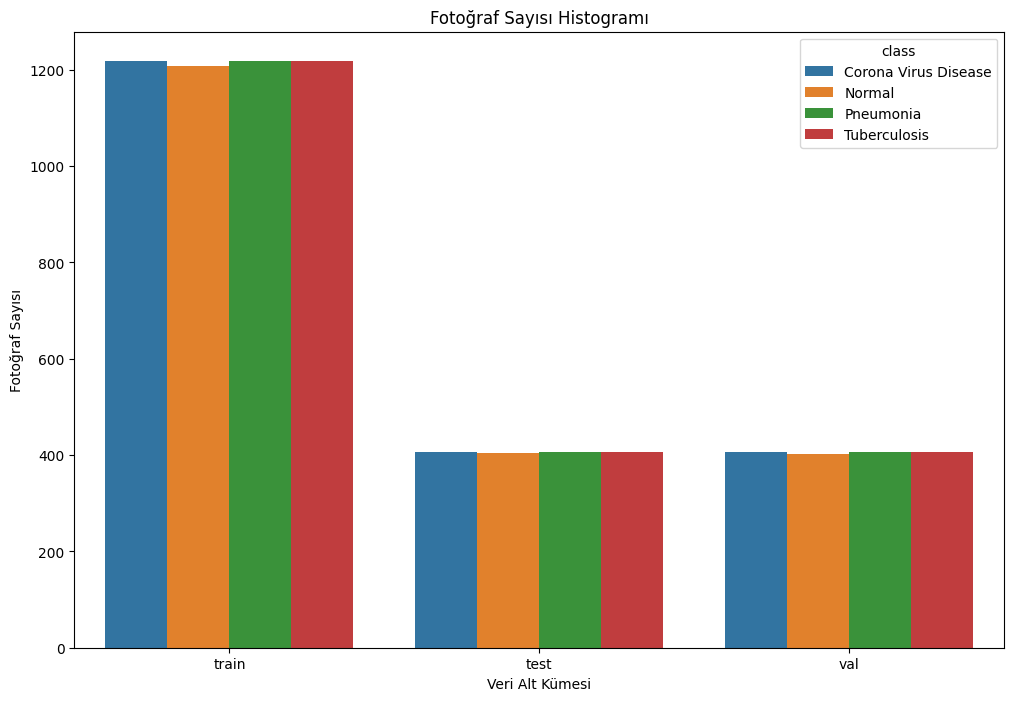

In [5]:
data = [
    {"subset": "train", "class": "Corona Virus Disease", "count": 1218},
    {"subset": "train", "class": "Normal", "count": 1207},
    {"subset": "train", "class": "Pneumonia", "count": 1218},
    {"subset": "train", "class": "Tuberculosis", "count": 1218},
    {"subset": "test", "class": "Corona Virus Disease", "count": 407},
    {"subset": "test", "class": "Normal", "count": 404},
    {"subset": "test", "class": "Pneumonia", "count": 407},
    {"subset": "test", "class": "Tuberculosis", "count": 407},
    {"subset": "val", "class": "Corona Virus Disease", "count": 406},
    {"subset": "val", "class": "Normal", "count": 402},
    {"subset": "val", "class": "Pneumonia", "count": 406},
    {"subset": "val", "class": "Tuberculosis", "count": 406},
]

df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
sns.barplot(x="subset", y="count", hue="class", data=df)
plt.title("Fotoğraf Sayısı Histogramı")
plt.xlabel("Veri Alt Kümesi")
plt.ylabel("Fotoğraf Sayısı")
plt.show()


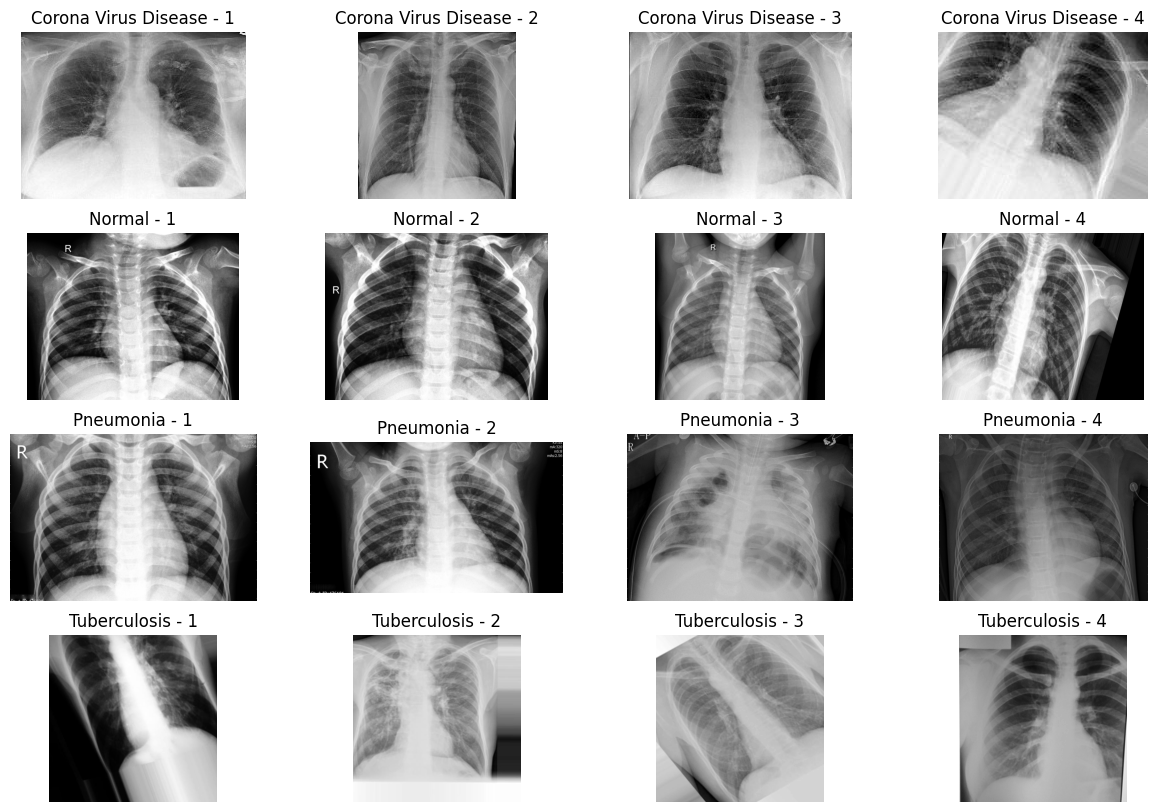

In [6]:
fig, axs = plt.subplots(len(class_names), 4, figsize=(15, 10))

for i, class_name in enumerate(class_names):
    for j in range(4):
        subset_path = os.path.join(base_dir, "train", class_name)
        img_name = os.listdir(subset_path)[j]
        img_path = os.path.join(subset_path, img_name)
        
        # Load and add the image to the subplot
        img = mpimg.imread(img_path)
        axs[i, j].imshow(img, cmap='gray')
        axs[i, j].set_title(f"{class_name} - {j+1}")
        axs[i, j].axis('off')  # Turn off axes

# Show the plot
plt.show()

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip = True,
                                   fill_mode = "nearest",
                                   rotation_range = 40,
                                   featurewise_center=False,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip = True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (300, 300),
                                                    class_mode  = 'categorical',
                                                    color_mode = 'rgb')

Found 4861 images belonging to 4 classes.


In [8]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size = (300, 300),
                                                class_mode  = 'categorical',
                                                color_mode = 'rgb')

Found 1620 images belonging to 4 classes.


In [9]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') >= 0.96:
            print("\nReached 96% accuracy. Stopping training.")
            self.model.stop_training = True

callbacks = myCallbacks()            

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding = 'same',  activation = 'relu', input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128, activation= 'relu'),
    tf.keras.layers.Dense(units = 256, activation= 'relu'),
    tf.keras.layers.Dense(units = 512, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),    
    tf.keras.layers.Dense(units = 1024, activation= 'relu'),
    tf.keras.layers.Dense(units = 4, activation= 'sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 37, 37, 64)        0

In [12]:
model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32,
    callbacks=[callbacks]  
)

Epoch 1/50
151/151 [==============================] - 512s 3s/step - loss: 1.0429 - accuracy: 0.5498 - val_loss: 0.8327 - val_accuracy: 0.6369
Epoch 2/50
151/151 [==============================] - 395s 3s/step - loss: 0.7758 - accuracy: 0.6908 - val_loss: 0.7943 - val_accuracy: 0.6913
Epoch 3/50
151/151 [==============================] - 212s 1s/step - loss: 0.6927 - accuracy: 0.7291 - val_loss: 0.7922 - val_accuracy: 0.7069
Epoch 4/50
151/151 [==============================] - 173s 1s/step - loss: 0.6398 - accuracy: 0.7594 - val_loss: 0.6196 - val_accuracy: 0.7406
Epoch 5/50
151/151 [==============================] - 167s 1s/step - loss: 0.5560 - accuracy: 0.7956 - val_loss: 0.4874 - val_accuracy: 0.8231
Epoch 6/50
151/151 [==============================] - 170s 1s/step - loss: 0.5488 - accuracy: 0.7969 - val_loss: 0.4104 - val_accuracy: 0.8494
Epoch 7/50
151/151 [==============================] - 172s 1s/step - loss: 0.4771 - accuracy: 0.8190 - val_loss: 0.4311 - val_accuracy: 0.8425

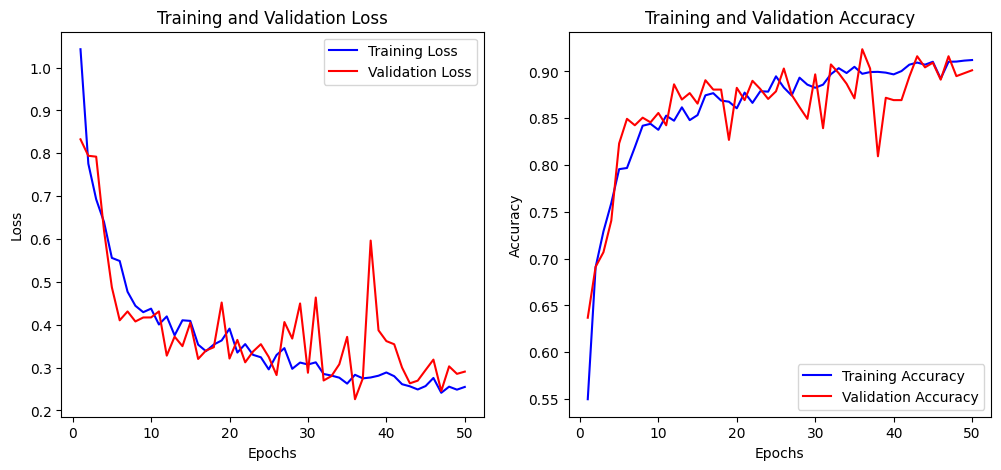

In [14]:
# Get loss and accuracy values for training and validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the number of epochs for training and validation
epochs = range(1, len(train_loss) + 1)

# Loss plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
model_weight = model.save("lung_disease_model.h5")

c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


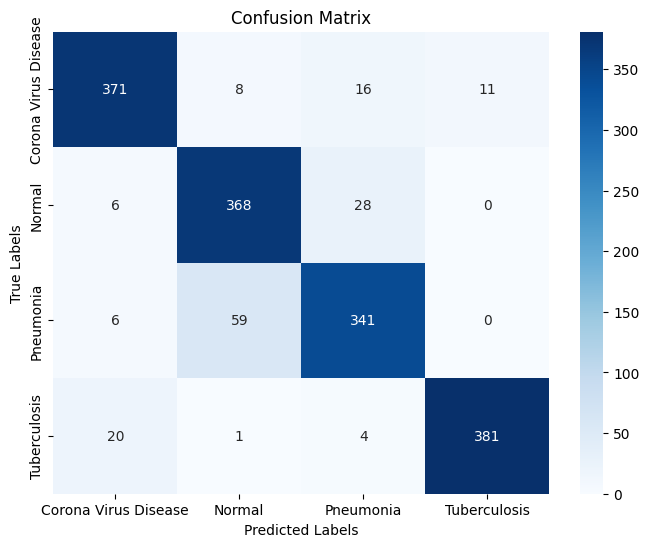

In [16]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Validation dataset path
val_path = val_dir

# Load the saved model
model_weight = load_model("lung_disease_model.h5")

# Predictions and actual labels
predictions = []
labels = []

# Iterate through each class
for class_name in class_names:
    class_path = os.path.join(val_path, class_name)
    
    # Iterate through each image
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        
        # Load and resize the image
        img = image.load_img(img_path, target_size=(300, 300))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Normalization
        
        # Make a prediction
        prediction = model_weight.predict(img_array, verbose=0)
        predicted_class = np.argmax(prediction)
        
        # Add predictions and labels to the lists
        predictions.append(predicted_class)
        labels.append(class_names.index(class_name))

# Create the confusion matrix
cm = confusion_matrix(labels, predictions)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [17]:
!pip install visualkeras

                                              0.0/44.9 kB ? eta -:--:--
     ---------------------------              30.7/44.9 kB 1.3 MB/s eta 0:00:01
     ----------------------------------     41.0/44.9 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 44.9/44.9 kB 368.5 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


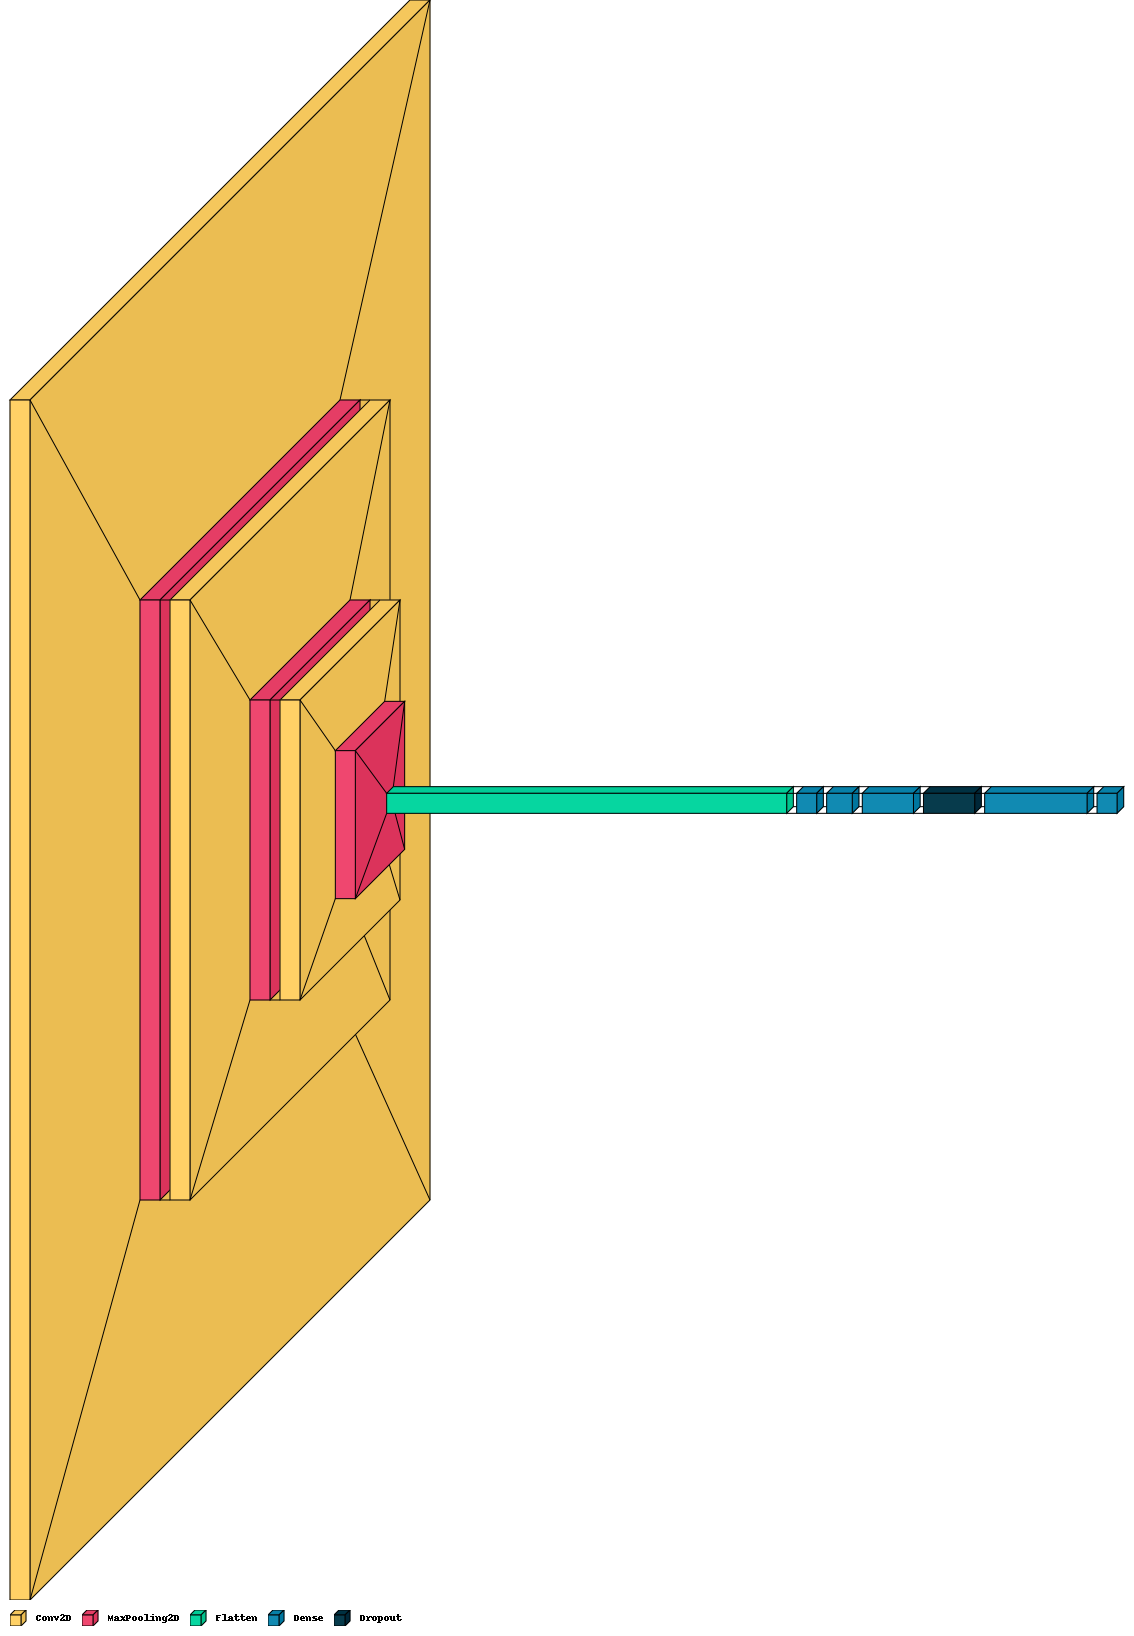

In [18]:
from PIL import ImageFont
import visualkeras

visualkeras.layered_view( model_weight , legend=True )  # font is optional!